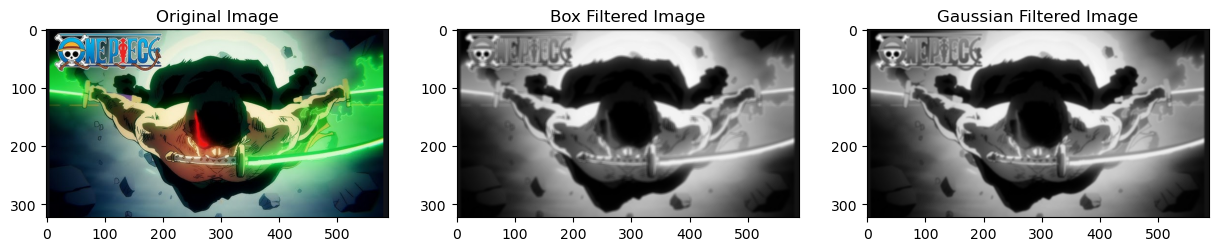

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/home/student/Pictures/Screenshots/Screenshot from 2024-12-04 11-56-45.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

box_kernel = np.ones((5, 5), np.float32) / 25

box_filtered = cv2.filter2D(gray, -1, box_kernel)

gauss_kernel = np.zeros((5, 5), np.float32)
sigma = 1.4
for i in range(5):
    for j in range(5):
        gauss_kernel[i, j] = np.exp(-((i-2)**2 + (j-2)**2) / (2 * sigma**2))
gauss_kernel /= np.sum(gauss_kernel)

gauss_filtered = cv2.filter2D(gray, -1, gauss_kernel)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(box_filtered, cmap='gray')
ax[1].set_title('Box Filtered Image')
ax[2].imshow(gauss_filtered, cmap='gray')
ax[2].set_title('Gaussian Filtered Image')
plt.show()